In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [2]:
filename = 'online_shoppers_intention.csv'
df = pd.read_csv('online_shoppers_intention.csv')
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

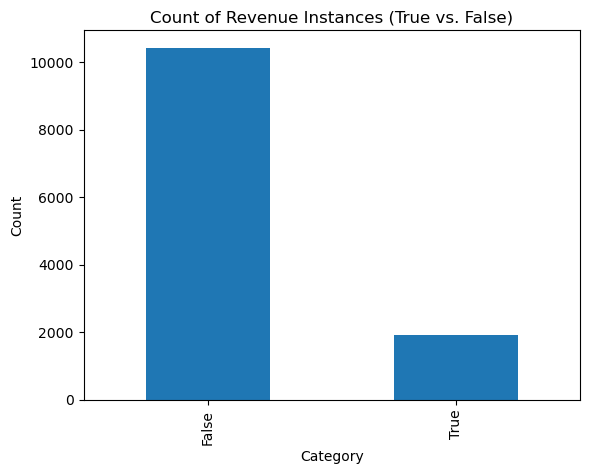

In [6]:
# bar chart of revenue value counts
counts = df['Revenue'].value_counts()

counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Revenue Instances (True vs. False)')
plt.show()

# Preprocessing

In [8]:
def preprocessing(df):
    num_cols = list(df.drop(columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']).columns)
    cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

    X = df.drop(columns = ['Revenue'])
    y = df['Revenue']

    # Encode Categorical Columns
    encoder = OneHotEncoder(sparse_output=False)
    for col in cat_cols:
        # encode categorical feature and create a new df
        encoded_col = encoder.fit_transform(X[[col]])
        col_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out([col]), index=X.index) 
    
        X = pd.concat([X, col_df], axis = 1) # add encoded df to df
        X = X.drop(columns = [col]) # drop original column

    # Label encode response variable
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split into training and test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

    # Scale Numerical Columns
    scaler = MinMaxScaler()
    scaler.fit(X_train[num_cols])
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])

    return X_train, X_test, y_train, y_test

# Neural Network

In [12]:
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import layers

In [97]:
def build_nn():
    # build a model
    model = Sequential(name = "MLP")
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Explicitly define input layer
    model.add(Dense(50, activation='relu', name="Hidden_ReLU")) # number of neurons chosen using 2/3 rule of thumb
    model.add(Dense(1, activation='sigmoid', name="Output_Sigmoid")) # output layer
    model.summary()

    # compile the model
    model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

    # early stopping callback if validation accuracy does not improve for 10 epochs  
    es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

    return model, es

def build_2layer_nn():
    # build a model
    model = Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Explicitly define input layer
    model.add(Dense(50, activation='relu')) # number of neurons chosen using 2/3 rule of thumb
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer

    # compile the model
    model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

    # early stopping callback if validation accuracy does not improve for 10 epochs  
    es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

    return model, es

# Hyperparamter Grid Search

In [44]:
# Get processed data
X_train, X_test, y_train, y_test = preprocessing(df)

batch_size_list = [5, 10, 15, 20, 30, 50, 100]
grid_search_results = []
for batch in batch_size_list:
    model, es = build_nn()

    # now we just update our model fit call
    history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=batch,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=0)

    # get accuracy
    accuracy = np.max(history.history['val_accuracy'])
    grid_search_results.append([batch, accuracy])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
for i in range(len(grid_search_results)):
    print(f"Batch = {grid_search_results[i][0]}, Accuracy = {grid_search_results[i][1]}")

Batch = 5, Accuracy = 0.8872668147087097
Batch = 10, Accuracy = 0.885644793510437
Batch = 15, Accuracy = 0.8888888955116272
Batch = 20, Accuracy = 0.8795620203018188
Batch = 30, Accuracy = 0.8730738162994385
Batch = 50, Accuracy = 0.8815895915031433
Batch = 100, Accuracy = 0.8734793066978455


# Single Run of NN

In [16]:
# Get processed data
X_train, X_test, y_train, y_test = preprocessing(df)

# Build NN from function
model, es = build_nn()

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=15,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8458 - loss: 0.4212 - val_accuracy: 0.8459 - val_loss: 0.3655
Epoch 2/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.3441 - val_accuracy: 0.8532 - val_loss: 0.3435
Epoch 3/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.3127 - val_accuracy: 0.8650 - val_loss: 0.3227
Epoch 4/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.2972 - val_accuracy: 0.8698 - val_loss: 0.3127
Epoch 5/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.2787 - val_accuracy: 0.8674 - val_loss: 0.3200
Epoch 6/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8872 - loss: 0.2796 - val_accuracy: 0.8710 - val_loss: 0.3093
Epoch 7/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.2744 - val_accuracy: 0.8747 - val_loss: 0.3042
Epoch 8/80
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.2696 - val_accuracy: 0.

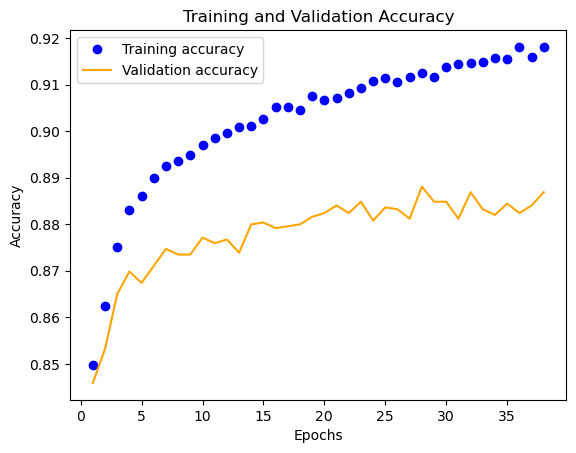

The Neural Network Model epoch with the best validation accuracy was 0.8880778551101685


In [18]:
# accuracy for learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'bo', label='Training accuracy') # training accuracy as dots
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy') # validation accuracy as line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

# Get best accuracy from epochs
best_acc = np.max(val_acc)
print("The Neural Network Model epoch with the best validation accuracy was " + str(best_acc)) 

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predict and round values to 1 or 0
model.predict(X_test)
preds = np.round(model.predict(X_test),0)

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))

print("\nClassification Report:")
print(classification_report(y_test, preds))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix:
[[1987   68]
 [ 208  203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.75      0.49      0.60       411

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466



# Cross-Validation Performance

In [76]:
# redo preprocessing without scaling
num_cols = list(df.drop(columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']).columns)
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

X = df.drop(columns = ['Revenue'])
y = df['Revenue']

# Encode Categorical Columns
encoder = OneHotEncoder(sparse_output=False)
for col in cat_cols:
    # encode categorical feature and create a new df
    encoded_col = encoder.fit_transform(X[[col]])
    col_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out([col]), index=X.index) 
    
    X = pd.concat([X, col_df], axis = 1) # add encoded df to df
    X = X.drop(columns = [col]) # drop original column

# Label encode response variable
le = LabelEncoder()
y = le.fit_transform(y)

# Flatten
X = X.to_numpy().reshape((X.shape[0], -1))

# Get 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
for fold, (train_i, test_i) in enumerate(cv.split(X)):
    # split train set into further train-test folds
    X_fold_train = X[train_i]
    X_fold_test = X[test_i]
    y_fold_train = y[train_i]
    y_fold_test = y[test_i]

    # Scale after splitting into train/test
    scaler = MinMaxScaler()
    scaler.fit(X_fold_train)
    X_fold_train = scaler.transform(X_fold_train)
    X_fold_test = scaler.transform(X_fold_test)
    
    # create model and fit
    model, es = build_nn()
    model.fit(X_fold_train, y_fold_train, 
              callbacks=[es],
              epochs=80, 
              batch_size=15,
              validation_data=(X_fold_test, y_fold_test),
              shuffle=True,
              verbose=0)

    # Get predictions and record accuracy
    model.predict(X_fold_test)
    preds = np.round(model.predict(X_fold_test),0)
    accuracy = accuracy_score(y_fold_test, preds)
    accuracies.append(accuracy)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
# After all runs, calculate average accuracy
for i in range(len(accuracies)):
    print(f"Fold {i} Accuracy = {accuracies[i]}")
average_acc = np.mean(accuracies)
print(f"\nThe average accuracy of the Cross-Validation is: {average_acc}")

Fold 0 Accuracy = 0.8852392538523925
Fold 1 Accuracy = 0.9002433090024331
Fold 2 Accuracy = 0.8998377939983779
Fold 3 Accuracy = 0.8933495539334956
Fold 4 Accuracy = 0.8949716139497161

The average accuracy of the Cross-Validation is: 0.8947283049472832
